In [43]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras import Model

In [45]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [46]:
input_layer = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output_layer = Dense(10, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

In [49]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.3364 - loss: 1.8373
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5451 - loss: 1.2953
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5899 - loss: 1.1665
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.6133 - loss: 1.1033
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6355 - loss: 1.0448


In [54]:
conv_layer = model.layers[1]
filters, biases = conv_layer.get_weights()

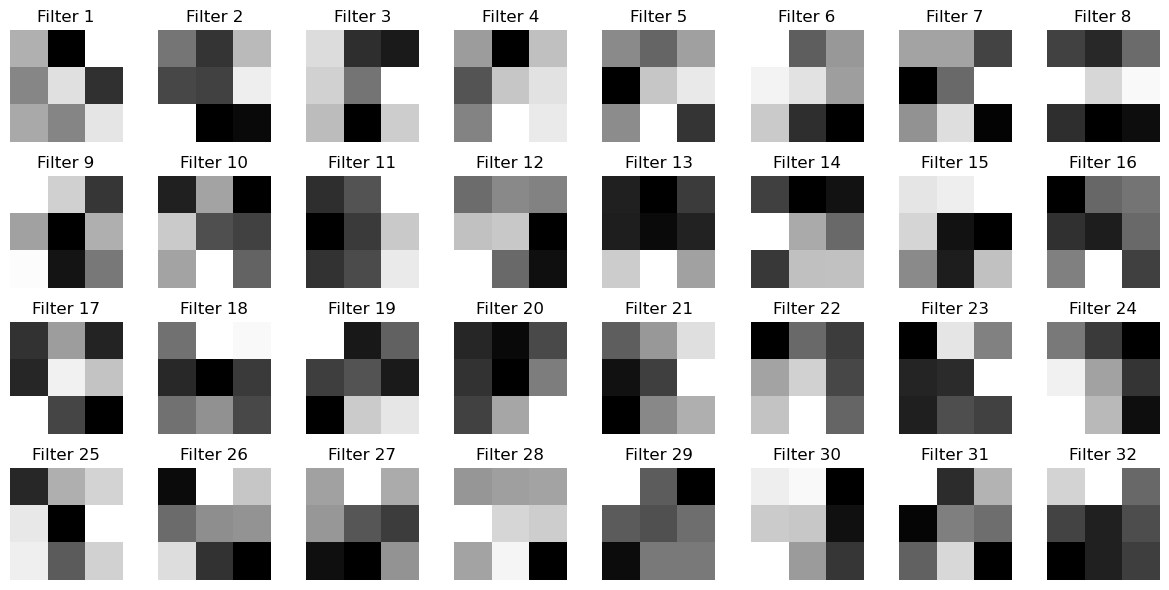

In [56]:
fig, axes = plt.subplots(4, 8, figsize=(12, 6))
axes = axes.ravel()
for i in range(32):
    f = filters[:, :, 0, i]  
    axes[i].imshow(f, cmap='gray')
    axes[i].set_title(f"Filter {i+1}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [58]:
test_img = np.expand_dims(X_test[0], axis=0)
feature_model = Model(inputs=model.input, outputs=model.layers[1].output)
feature_maps = feature_model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


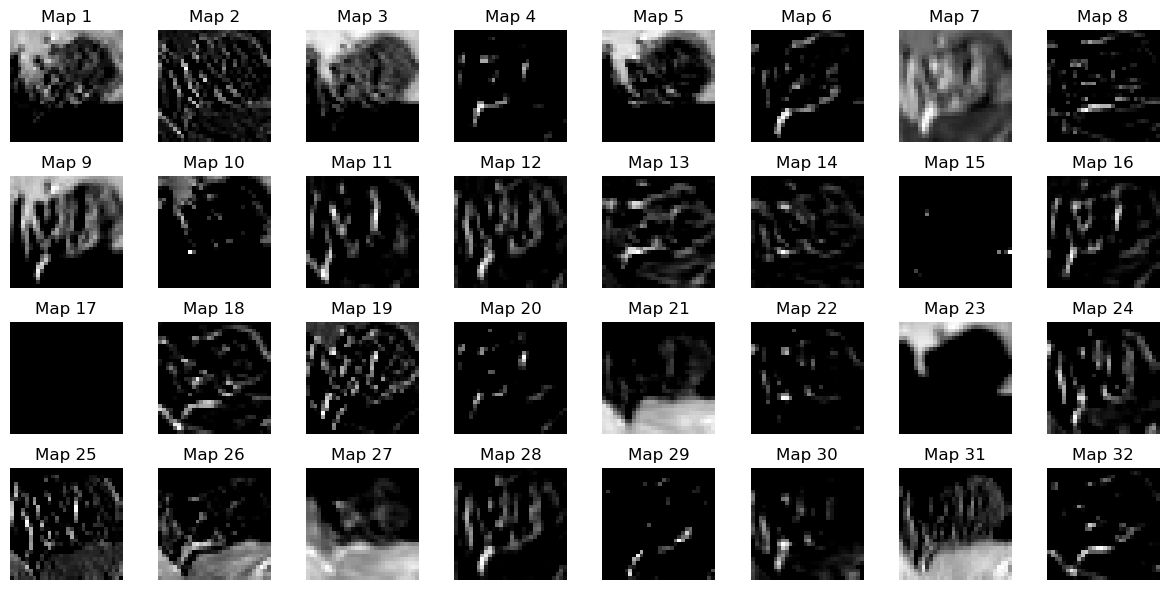

In [60]:
fig, axes = plt.subplots(4, 8, figsize=(12, 6))
axes = axes.ravel()
for i in range(32):
    axes[i].imshow(feature_maps[0, :, :, i], cmap='gray')
    axes[i].set_title(f"Map {i+1}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()